# Bitcoin Historical Prediction

This project aims to analyze the data of the digital currency, namely bitcoin, such as the opening price, the highest price reached by the currency in this time period, the lowest price reached in the same time period, the extent of dealing with it and many others to predict whether the investor can buy shares or not

## About the Dataset

This minute by minute historical dataset of bitcoin prices offers a wealth of information for data scientists and analysts. In addition to the OHLC prices for each minute, this dataset also includes the volume of bitcoin traded during that time period. This granular data, going back to **2021**, allows for in-depth analysis of the market fluctuations and trends of the world's most popular cryptocurrency. With this dataset, researchers can study the underlying mechanisms of the bitcoin network, traders can gain a better understanding of market movements, and investors can make more informed decisions about their investments. The open, high, low, and close prices, as well as the volume data, provide a wealth of information for analyzing the market and identifying potential opportunities. Whether you're looking to gain a competitive edge as a trader, conduct research on the bitcoin market, or simply want to learn more about the world of cryptocurrency, this dataset is a valuable resource. With its rich and detailed data, you'll be able to dive deep into the world of bitcoin and uncover insights that can help you make better decisions.

## Dataset Content

* Timestamp: This is the UNIX timestamp or the "Epoch Time", number of seconds elapsed since 00:00:00 UTC on 1 January 1970.
* Date: Date and time of price recording.
* Open - This is the opening price of the time period (in US Dollars).
* High - This is the highest price of the time period (in US Dollars).
* Low - This is the lowest price of the time period (in US Dollars).
* Close - This is the closing price of the time period (in US Dollars).
* Volume BTC - This is the volume of ₿ transacted in the time interval.

In [1]:
# Import necessary libraries
import pandas as pd   # For data manipulation and analysis using DataFrames
import numpy as np    # For numerical operations
import seaborn as sns # For creating visualizations
import matplotlib.pyplot as plt # For plotting data

# Import specific functions from scikit-learn library
from sklearn.model_selection import train_test_split # For splitting the dataset into training and testing sets
from sklearn.metrics import accuracy_score        # For calculating accuracy
from sklearn.metrics import confusion_matrix      # For calculating and plotting the confusion matrix
from sklearn.metrics import recall_score          # For calculating recall
from sklearn.metrics import precision_score       # For calculating precision
from sklearn.metrics import f1_score              # For calculating the F1 score
from sklearn.metrics import classification_report # For printing a summary report of evaluation metrics

In [2]:
# Read The Dataset
dataset = pd.read_csv('Bitcoin Historical Data.csv')

In [3]:
# show sample of dataset 
dataset.sample(10)

,Timestamp,Date,Open,High,Low,Close,Volume
870648,1.620000e+12,6/23/2021 22:16,62959.17,62959.17,62959.16,62959.17,0.014851
511756,1.640000e+12,2/28/2022 3:48,48630.38,48660.98,48628.36,48638.09,0.083209
370951,1.650000e+12,6/5/2022 23:37,47955.74,48020.63,47939.28,48020.63,0.907956
69907,1.670000e+12,1/3/2023 9:54,19300.89,19303.73,19295.65,19302.19,0.557941
683591,1.630000e+12,10/31/2021 19:53,49242.10,49249.69,49226.06,49226.06,0.021729
554180,1.640000e+12,1/29/2022 16:44,58070.60,58153.33,58070.60,58133.98,1.240443
819536,1.620000e+12,7/29/2021 10:08,39647.39,39647.39,39573.70,39614.61,1.900672
629089,1.630000e+12,12/8/2021 16:15,43484.61,43545.27,43484.61,43518.24,0.022241
615782,1.630000e+12,12/17/2021 22:02,55597.59,55603.99,55597.59,55603.99,0.002644
541660,1.640000e+12,2/7/2022 9:24,57819.04,57819.04,57749.70,57782.11,0.524077


## Data Preprocessing

* First, we examined the shape of the data to understand its dimensions.
* Handling Null Values: Next, we checked for any null values in the dataset and removed them to ensure data completeness.
* Removing Duplicates: Additionally, we conducted a check for duplicate values and replaced them to maintain data integrity.
* Visualizing Correlation: To gain insights into the relationships between different variables, we used a heatmap to create a correlation map. This allowed us to identify patterns and dependencies among the features in the dataset, providing a better understanding of their interplay.

In [4]:
# show the shape of dataset
print(f'The Dataset Contains {dataset.shape[0]} Rows And {dataset.shape[1]} Columns')

The Dataset Contains 1048575 Rows And 7 Columns


In [5]:
# Stastic about the data set
dataset.describe()

,Timestamp,Open,High,Low,Close,Volume
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.639372e+12,3.800239e+04,3.802369e+04,3.798059e+04,3.800239e+04,1.273603e+00
std,1.856045e+10,1.364328e+04,1.365050e+04,1.363577e+04,1.364328e+04,4.652642e+00
min,1.610000e+12,1.550000e+04,1.553917e+04,1.548562e+04,1.550000e+04,0.000000e+00
25%,1.620000e+12,2.370767e+04,2.372089e+04,2.369232e+04,2.370767e+04,2.933439e-02
50%,1.640000e+12,3.876418e+04,3.878888e+04,3.874020e+04,3.876418e+04,2.051056e-01
75%,1.660000e+12,4.795259e+04,4.797799e+04,4.792746e+04,4.795259e+04,9.859753e-01
max,1.670000e+12,6.899887e+04,6.900000e+04,6.878700e+04,6.899887e+04,5.781141e+02


In [6]:
# show the information of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Timestamp  1048575 non-null  float64
 1   Date       1048575 non-null  object 
 2   Open       1048575 non-null  float64
 3   High       1048575 non-null  float64
 4   Low        1048575 non-null  float64
 5   Close      1048575 non-null  float64
 6   Volume     1048575 non-null  float64
dtypes: float64(6), object(1)
memory usage: 56.0+ MB


In [7]:
# check the missing value
dataset.isna().sum()

Timestamp    0
Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64

In [8]:
# check the duplicate of dataset
print(f'The Dataset Contains {dataset.duplicated().sum()} Duplicate Values')

The Dataset Contains 0 Duplicate Values


In [9]:
#  Remove the column called Date to help do correlation
dataset = dataset.drop(['Date'] , axis = 1)

In [10]:
# show the shape of dataset
print(f'The Dataset Contains {dataset.shape[0]} Rows And {dataset.shape[1]} Columns')

The Dataset Contains 1048575 Rows And 6 Columns


## Data Visualization

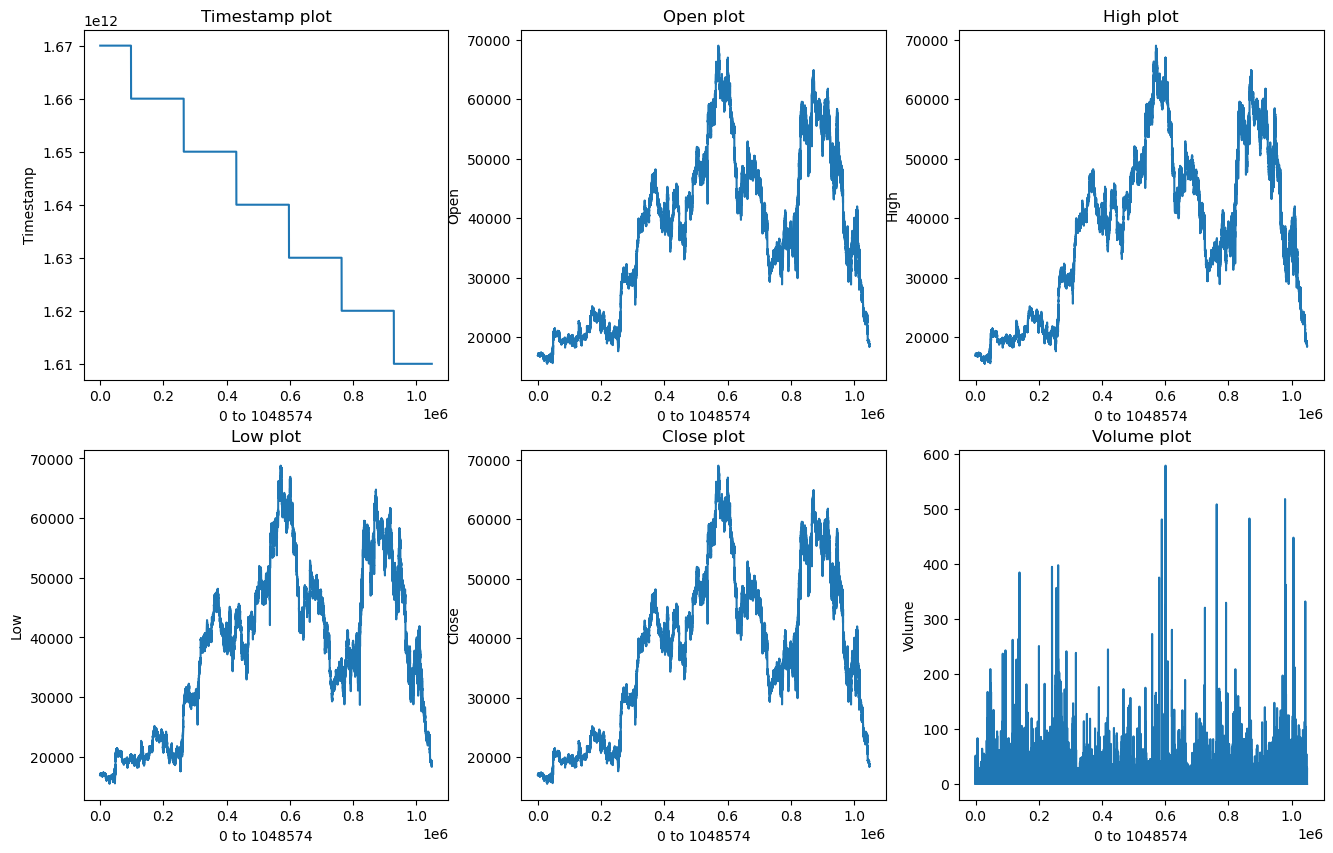

In [4]:
fig, axs = plt.subplots(len(dataset.columns)//3, 3, figsize = (16, 10))  # print the three columns in row 
for idx, i in enumerate(dataset.columns):   # for loop --> parameter the columns in dataset
    row, col = 0 if idx<=2 else 1, idx%3 # read the row and columns
    axs[row, col].plot(dataset[i])  # axs the row and columns
    axs[row, col].set_xlabel(f'{dataset.index[0]} to {dataset.index[-1]}') # range the timestamp in x axs
    axs[row, col].set_ylabel(i) # the value of columns in y axs
    axs[row, col].set_title(f'{i} plot') # print the title up every plot

In [11]:
# show the correlation between all quantities 
dataset.corr()

,Timestamp,Open,High,Low,Close,Volume
Timestamp,1.000000,-0.589720,-0.590119,-0.589290,-0.589725,-0.074161
Open,-0.589720,1.000000,0.999996,0.999996,0.999994,-0.003493
High,-0.590119,0.999996,1.000000,0.999993,0.999997,-0.002678
Low,-0.589290,0.999996,0.999993,1.000000,0.999996,-0.004568
Close,-0.589725,0.999994,0.999997,0.999996,1.000000,-0.003600
Volume,-0.074161,-0.003493,-0.002678,-0.004568,-0.003600,1.000000


<Axes: >

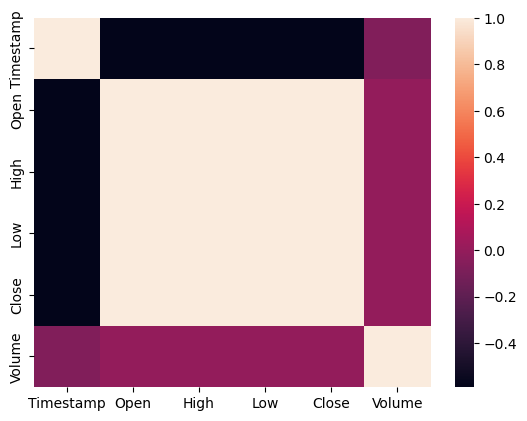

In [12]:
# show plot the correlation between all quantities
sns.heatmap(dataset.corr(), xticklabels=dataset.columns, yticklabels=dataset.columns)

### It is necessary to clear the column called (Timestamp , Volume)

## Create features to help predict

Such as the opening price, the highest price reached by the currency in this time period , the lowest price reached in the same time period, the extent of its handling and many others

In [13]:
# load the old columns
old_col = dataset.columns

def get_feature_dataset_new(dataframe):
    # Add Feature --> calculate the mean in open , high , low , close
    dataframe['Mean_Price'] = dataframe[['Open' , 'High' , 'Low' , 'Close']].mean(axis = 1)
    # Candlestick consist of two part the body (open and close) and Upper , lower shadow  
    dataframe['Shadow_Upper'] = dataframe['High'] - np.maximum(dataframe['Open'] , dataframe['Close'])
    dataframe['Shadow_Lower'] = dataframe['Low'] - np.minimum(dataframe['Open'], dataframe['Close'])
    # Spread is the difference between high Shadow and low Shadow
    dataframe['Spread'] = dataframe['High'] - dataframe['Low']
    # Trade is the difference between Close Price and Open Price
    dataframe['Trade'] = dataframe['Close'] - dataframe['Open']
    # Calculate the change of price using log
    dataframe['Open_Close_Log_Price_Change'] = np.log(dataframe['Close'] / dataframe['Open'])
    dataframe['Ten_period_Simple_Moving_Average'] = dataframe['Close'].rolling(10).mean().fillna(0)
    dataframe['Twenty_period_Simple_Moving_Average'] = dataframe['Close'].rolling(20).mean().fillna(0)
    # diff --> Calculates the difference of a DataFrame element compared with another element in the DataFrame
    dataframe['Five_period_Log_Residual'] = pd.Series(np.log(dataframe['Close'])).diff(periods=5).fillna(0)
    dataframe['Ten_period_Log_Residual'] = pd.Series(np.log(dataframe['Close'])).diff(periods=10).fillna(0)
    dataframe['log_norm_close'] = np.log(dataframe['Close'] + 1)/10
    dataframe['Buy_And_Sell'] = dataframe['Close'].diff(periods=1)
    dataframe = dataframe.copy().loc[dataframe['Buy_And_Sell'].notna()]  # --> boolean (true or false)
    dataframe['Buy_And_Sell'] = dataframe['Buy_And_Sell'].apply(lambda x: 0 if x<=0 else 1)
    return dataframe

In [14]:
dataset = get_feature_dataset_new(dataset)

In [15]:
# show the shape of dataset
print(f'The Dataset Contains {dataset.shape[0]} Rows And {dataset.shape[1]} Columns')

The Dataset Contains 1048574 Rows And 18 Columns


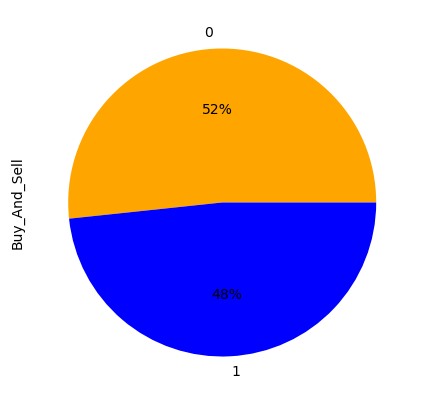

In [16]:
# plot the circle to show the % of ones and zeros in train and test dataset 
dataset.Buy_And_Sell.value_counts().plot(kind='pie', autopct='%1.0f%%',figsize=(5,5),colors=["orange", "blue"]);

In [17]:
# drop the column called Timestamp
dataset = dataset.drop(['Timestamp'] , axis = 1)
dataset = dataset.drop(['Volume'] , axis = 1)

In [18]:
# show the shape of dataset
print(f'The Dataset Contains {dataset.shape[0]} Rows And {dataset.shape[1]} Columns')

The Dataset Contains 1048574 Rows And 16 Columns


In [19]:
# Changing pandas data frame to NumPy array 
x_col = dataset.iloc[: , :15] 
x_col.shape  # shape → print the lenght of array

(1048574, 15)

In [20]:
# Changing pandas data frame to NumPy array 
y_col = dataset.iloc[: , 15:]
y_col.shape  # shape → print the lenght of array

(1048574, 1)

In [21]:
# Splitting the dataset ( train dataset = 90% , test dataset = 10%)
x_train, x_test, y_train, y_test = train_test_split( x_col , y_col , test_size = 0.20 , random_state = 100)  

In [22]:
# Show count the number of 0 , 1 in the train dataset and test dataset
print("Count The Value in Training dataset \n{}\n".format(y_train['Buy_And_Sell'].value_counts()))
print("================================")
print("\nCount The Value in Testing dataset \n{}".format(y_test['Buy_And_Sell'].value_counts()))

Count The Value in Training dataset 
0    433488
1    405371
Name: Buy_And_Sell, dtype: int64


Count The Value in Testing dataset 
0    108377
1    101338
Name: Buy_And_Sell, dtype: int64


## Decision Tree Classifier

In [23]:
# using library called sklearn and Module called tree and class called DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier  # load the DecisionTreeClassifier

DecisionTreeClassifierModel = DecisionTreeClassifier(max_depth = 4 , random_state = 100) # using 3 level and randam states 100 
DecisionTreeClassifierModel.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=100)

In [24]:
#Calculating Details
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(x_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(x_test, y_test))

DecisionTreeClassifierModel Train Score is :  0.6456901577023075
DecisionTreeClassifierModel Test Score is :  0.6456762749445676


In [25]:
# Calculating Prediction
y_pred = DecisionTreeClassifierModel.predict(x_test)

In [26]:
# show accuracy score
print("Accuracy Score:" , accuracy_score(y_test , y_pred));
# show recall score
print("Recall Socer:" , recall_score(y_test , y_pred , average='macro'));
# show precision score
print("Precision scoer:" , precision_score(y_test , y_pred , average='macro'));
# show f1 score
print("F1 score:" , f1_score(y_test , y_pred, average='macro'));

Accuracy Score: 0.6456762749445676
Recall Socer: 0.6457853774219827
Precision scoer: 0.6456227100304888
F1 score: 0.6455559479861963


In [27]:
# show classification report
print("Classification report:\n" , classification_report(y_test , y_pred));

Classification report:
               precision    recall  f1-score   support

           0       0.66      0.64      0.65    108377
           1       0.63      0.65      0.64    101338

    accuracy                           0.65    209715
   macro avg       0.65      0.65      0.65    209715
weighted avg       0.65      0.65      0.65    209715



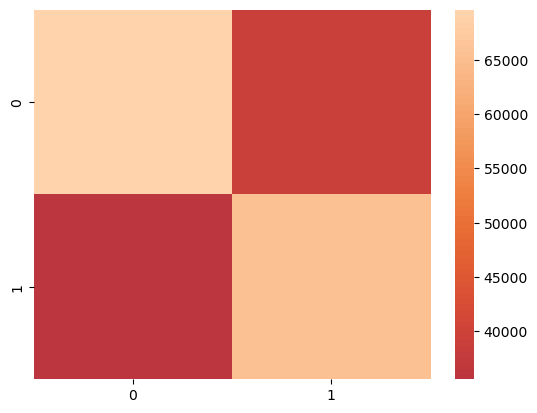

In [28]:
# show the confusion matrix
conf_mat = confusion_matrix(y_test , y_pred)
# drawing confusion matrix
sns.heatmap(conf_mat, center = True)
plt.show();

C:\Users\fathy\AppData\Local\Temp\ipykernel_3148\1763675997.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, color='red',  label='Actual Value',hist=False)
C:\Users\fathy\AppData\Local\Temp\ipykernel_3148\1763675997.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

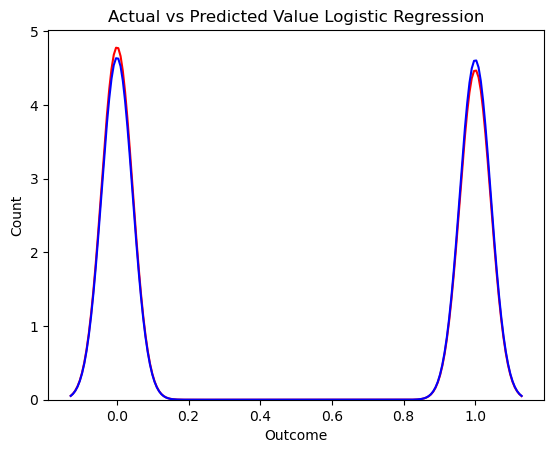

In [29]:
ax = sns.distplot(y_test, color='red',  label='Actual Value',hist=False)
sns.distplot(y_pred, color='blue', label='Predicted Value',hist=False,ax=ax)
plt.title('Actual vs Predicted Value Logistic Regression')
plt.xlabel('Outcome')
plt.ylabel('Count');

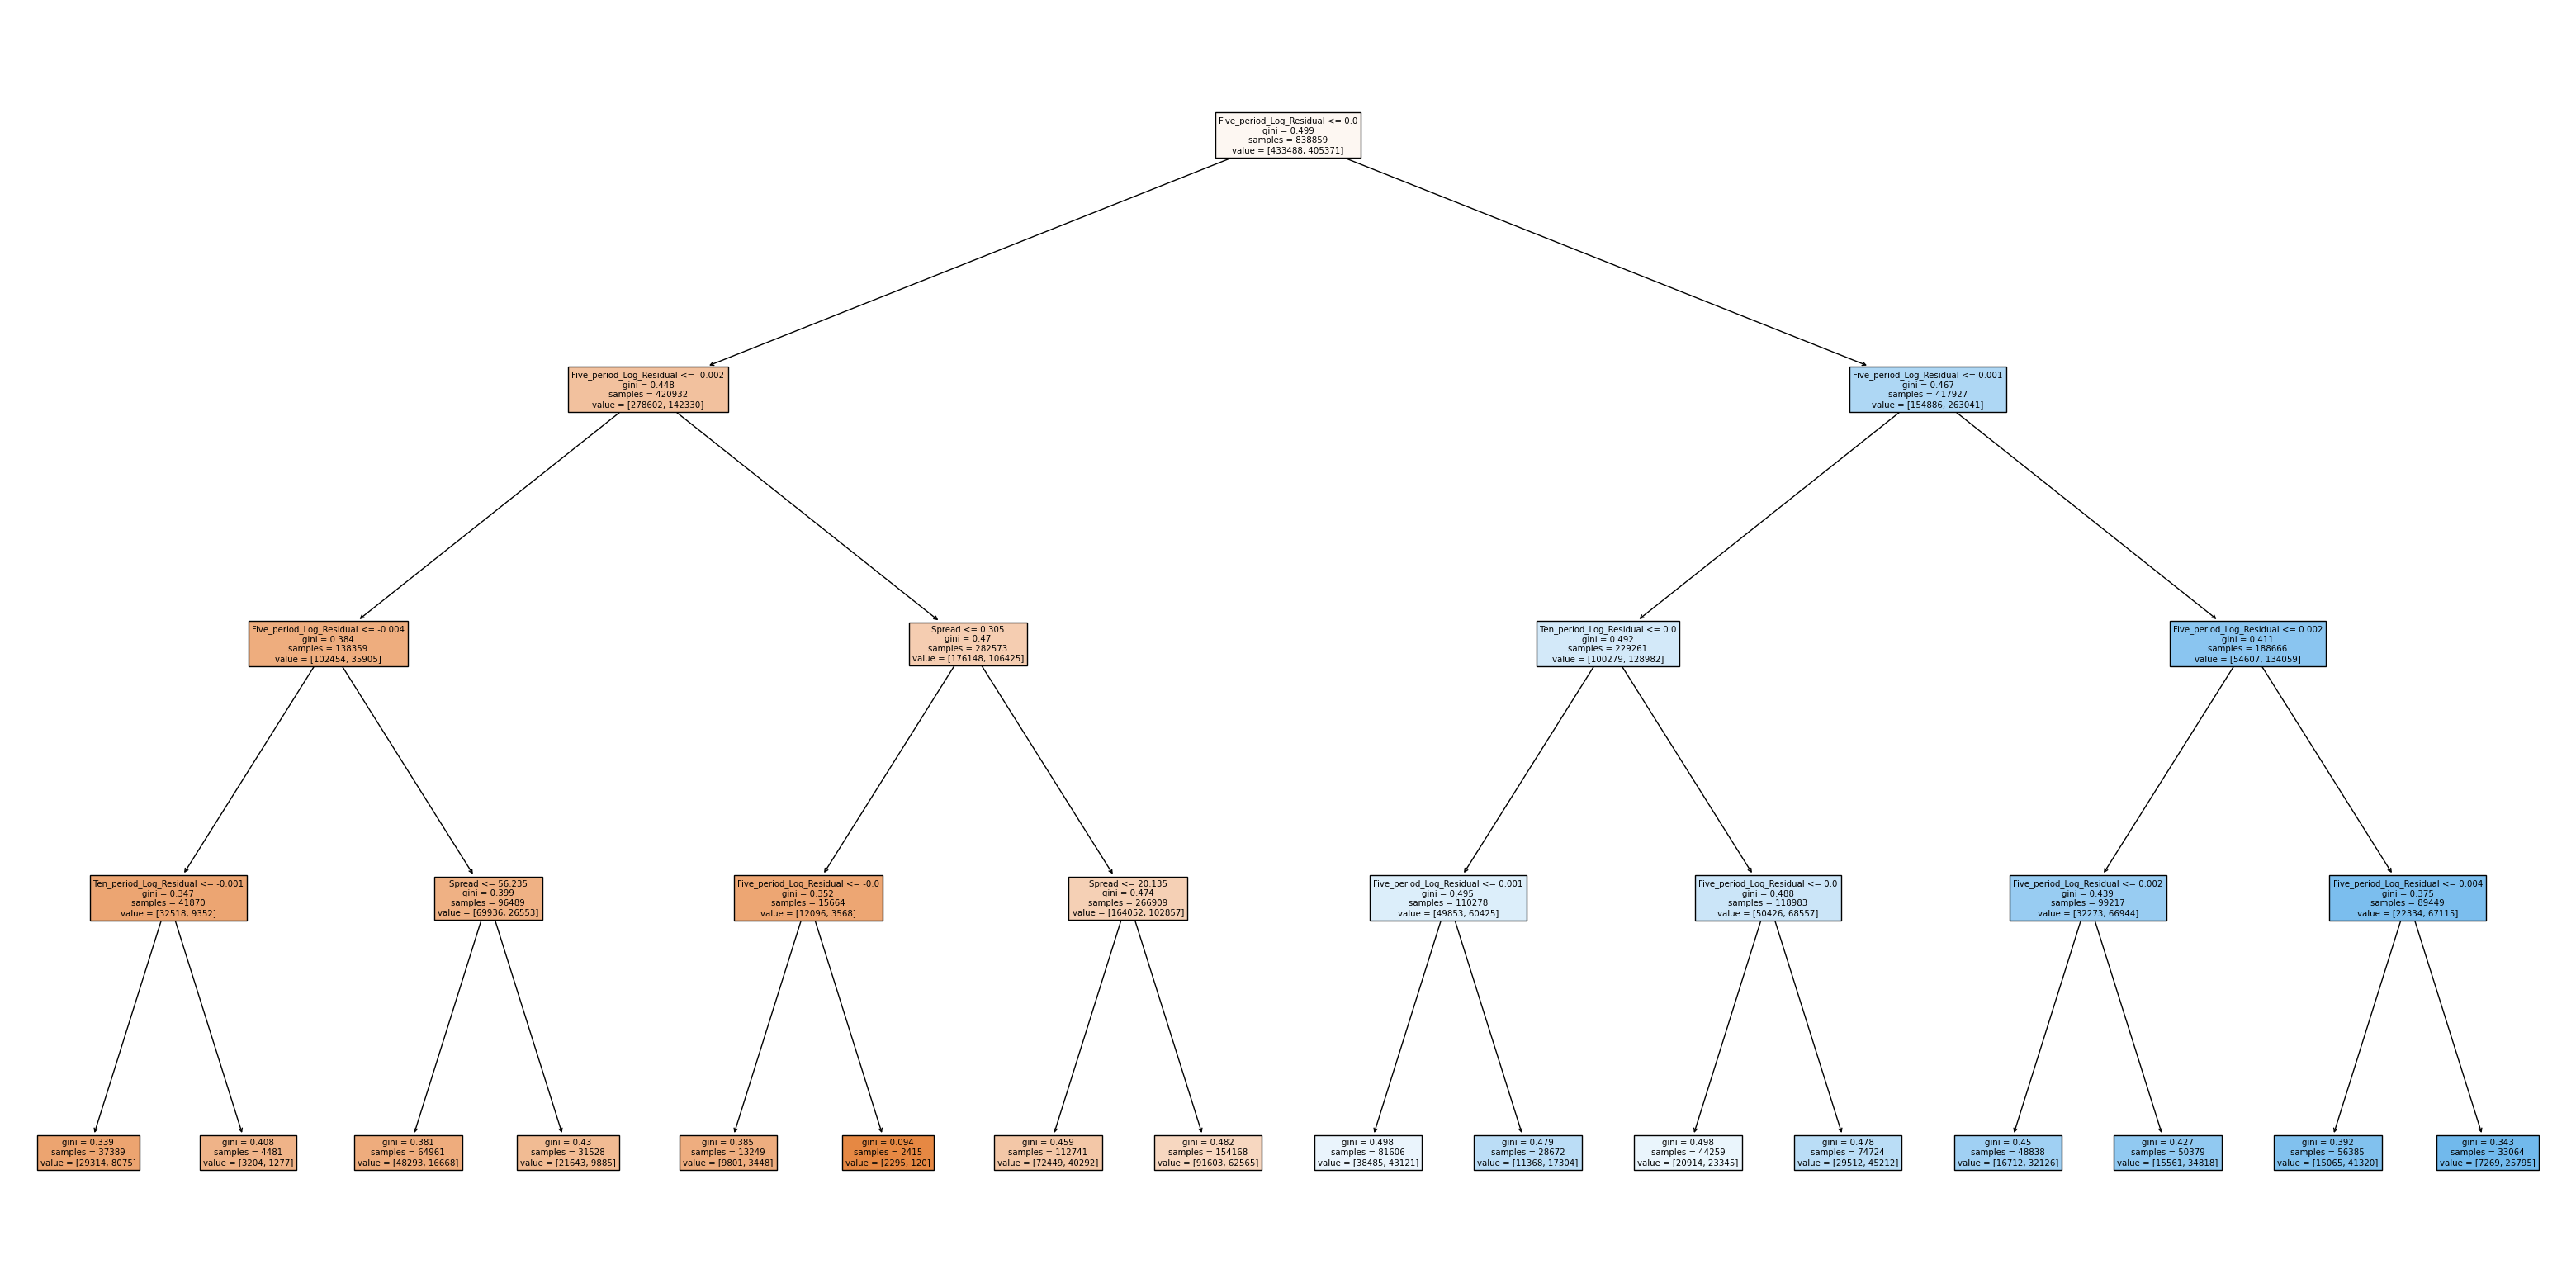

In [30]:
# load the library to drow the tree
from sklearn.tree import plot_tree 
plt.figure(figsize=(40,20)) # size of plot
plot_tree(DecisionTreeClassifierModel, feature_names = dataset.columns, filled=True);

# Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifierModel = RandomForestClassifier(n_estimators = 100 , max_depth = 8 , random_state = 100)
RandomForestClassifierModel.fit(x_train, y_train)

C:\Users\fathy\AppData\Local\Temp\ipykernel_3148\2141682245.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestClassifierModel.fit(x_train, y_train)


RandomForestClassifier(max_depth=8, random_state=100)

In [32]:
#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(x_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(x_test, y_test))

RandomForestClassifierModel Train Score is :  0.6484784689679672
RandomForestClassifierModel Test Score is :  0.6480747681377107


In [33]:
#Calculating Prediction
y_pred = RandomForestClassifierModel.predict(x_test)

In [34]:
# show accuracy score
print("Accuracy Score:" , accuracy_score(y_test , y_pred));
# show recall score
print("Recall Socer:" , recall_score(y_test , y_pred , average='macro'));
# show precision score
print("Precision scoer:" , precision_score(y_test , y_pred , average='macro'));
# show f1 score
print("F1 score:" , f1_score(y_test , y_pred, average='macro'));

Accuracy Score: 0.6480747681377107
Recall Socer: 0.6476035018977933
Precision scoer: 0.64765030534298
F1 score: 0.6476237255366742


In [35]:
# show classification report
print("Classification report:\n" , classification_report(y_test , y_pred));

Classification report:
               precision    recall  f1-score   support

           0       0.66      0.66      0.66    108377
           1       0.64      0.63      0.64    101338

    accuracy                           0.65    209715
   macro avg       0.65      0.65      0.65    209715
weighted avg       0.65      0.65      0.65    209715



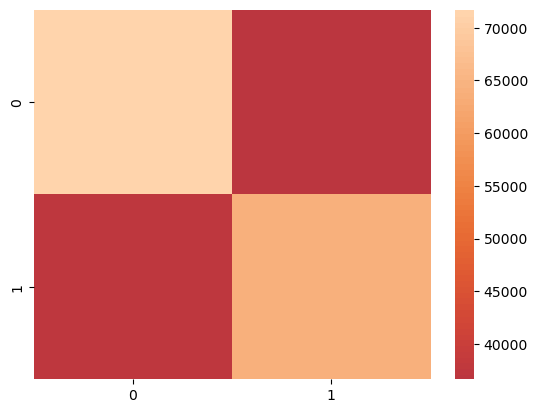

In [36]:
# show the confusion matrix
conf_mat = confusion_matrix(y_test , y_pred)
# drawing confusion matrix
sns.heatmap(conf_mat, center = True)
plt.show();

C:\Users\fathy\AppData\Local\Temp\ipykernel_3148\40282563.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, color='r',  label='Actual Value',hist=False)
C:\Users\fathy\AppData\Local\Temp\ipykernel_3148\40282563.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

Text(0, 0.5, 'Count')

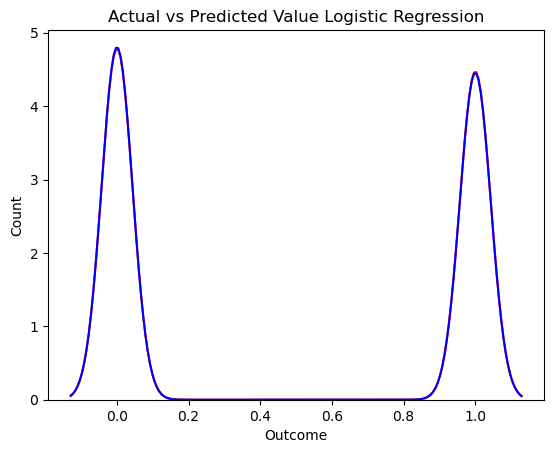

In [37]:
ax = sns.distplot(y_test, color='r',  label='Actual Value',hist=False)
sns.distplot(y_pred, color='b', label='Predicted Value',hist=False,ax=ax)
plt.title('Actual vs Predicted Value Logistic Regression')
plt.xlabel('Outcome')
plt.ylabel('Count')

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

LogisticRegressionModel = LogisticRegression()
LogisticRegressionModel.fit(x_train, y_train)

C:\Users\fathy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [39]:
# Calculating train score and test score
print('Logistic Regression train Score: ' , LogisticRegressionModel.score(x_train, y_train))
print('Logistic Regression test Score: ' , LogisticRegressionModel.score(x_test, y_test))

Logistic Regression train Score:  0.6821194026648102
Logistic Regression test Score:  0.6825119805450254


In [40]:
#Calculating Prediction
y_pred = LogisticRegressionModel.predict(x_test)

In [41]:
# show accuracy score
print("Accuracy Score:" , accuracy_score(y_test , y_pred));
# show recall score
print("Recall Socer:" , recall_score(y_test , y_pred , average='macro'));
# show precision score
print("Precision scoer:" , precision_score(y_test , y_pred , average='macro'));
# show f1 score
print("F1 score:" , f1_score(y_test , y_pred, average='macro'));

Accuracy Score: 0.6825119805450254
Recall Socer: 0.6810624197936801
Precision scoer: 0.6826314156629347
F1 score: 0.6811209738379462


In [42]:
# show classification report
print("Classification report:\n" , classification_report(y_test , y_pred));

Classification report:
               precision    recall  f1-score   support

           0       0.68      0.72      0.70    108377
           1       0.68      0.64      0.66    101338

    accuracy                           0.68    209715
   macro avg       0.68      0.68      0.68    209715
weighted avg       0.68      0.68      0.68    209715



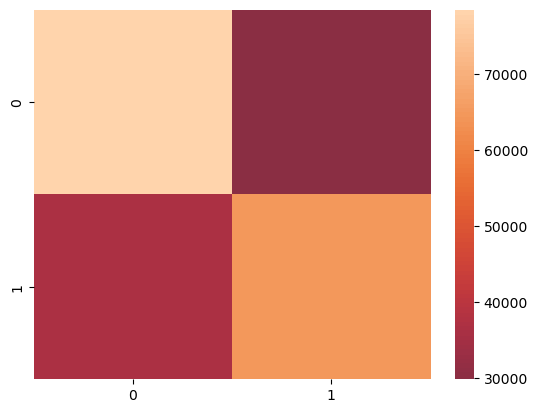

In [43]:
# show the confusion matrix
conf_mat = confusion_matrix(y_test , y_pred)
# drawing confusion matrix
sns.heatmap(conf_mat, center = True)
plt.show();

C:\Users\fathy\AppData\Local\Temp\ipykernel_3148\40282563.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, color='r',  label='Actual Value',hist=False)
C:\Users\fathy\AppData\Local\Temp\ipykernel_3148\40282563.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

Text(0, 0.5, 'Count')

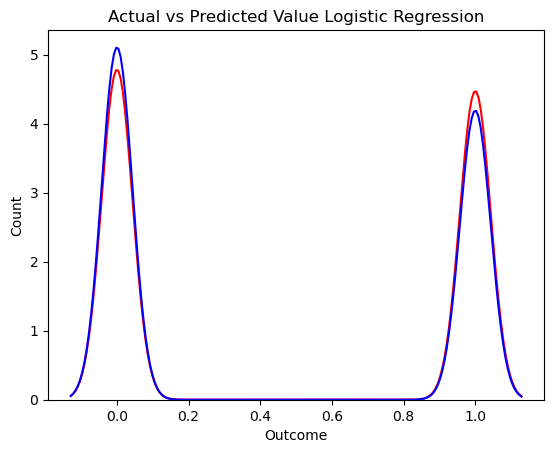

In [44]:
ax = sns.distplot(y_test, color='r',  label='Actual Value',hist=False)
sns.distplot(y_pred, color='b', label='Predicted Value',hist=False,ax=ax)
plt.title('Actual vs Predicted Value Logistic Regression')
plt.xlabel('Outcome')
plt.ylabel('Count')

# SVC

In [46]:
from sklearn.svm import SVC

SVCModel = SVC(kernel = 'rbf' , max_iter = 200)
SVCModel.fit(x_train, y_train)

C:\Users\fathy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fathy\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(max_iter=200)

In [47]:
# Calculating train score and test score
print('SVC train Score: ' , SVCModel.score(x_train, y_train))
print('SVC test Score: ' , SVCModel.score(x_test, y_test))

SVC train Score:  0.5152391522293973
SVC test Score:  0.5158286245619055


In [48]:
#Calculating Prediction
y_pred = SVCModel.predict(x_test)
# show accuracy score
print("Accuracy Score:" , accuracy_score(y_test , y_pred))
# show recall score
print("Recall Socer:" , recall_score(y_test , y_pred , pos_label='positive' , average='macro'))
# show precision score
print("Precision scoer:" , precision_score(y_test , y_pred,pos_label='positive' , average='macro'))
# show f1 score
print("F1 score:" , f1_score(y_test , y_pred,pos_label='positive' , average='macro'))

Accuracy Score: 0.5158286245619055
Recall Socer: 0.5083231576815421
Precision scoer: 0.5103988609136633
F1 score: 0.48605906140903343


C:\Users\fathy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\fathy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\fathy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [49]:
# show classification report
print("Classification report:\n" , classification_report(y_test , y_pred));

Classification report:
               precision    recall  f1-score   support

           0       0.52      0.73      0.61    108377
           1       0.50      0.28      0.36    101338

    accuracy                           0.52    209715
   macro avg       0.51      0.51      0.49    209715
weighted avg       0.51      0.52      0.49    209715



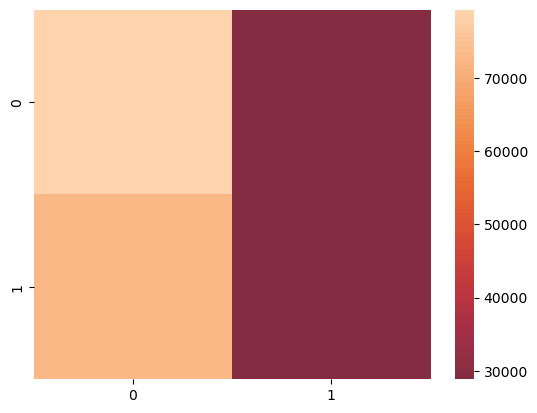

In [50]:
# show the confusion matrix
conf_mat = confusion_matrix(y_test , y_pred)
# drawing confusion matrix
sns.heatmap(conf_mat, center = True)
plt.show();

C:\Users\fathy\AppData\Local\Temp\ipykernel_3148\40282563.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, color='r',  label='Actual Value',hist=False)
C:\Users\fathy\AppData\Local\Temp\ipykernel_3148\40282563.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

Text(0, 0.5, 'Count')

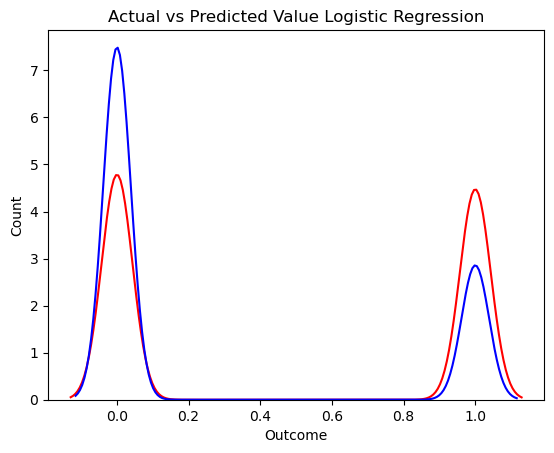

In [51]:
ax = sns.distplot(y_test, color='r',  label='Actual Value',hist=False)
sns.distplot(y_pred, color='b', label='Predicted Value',hist=False,ax=ax)
plt.title('Actual vs Predicted Value Logistic Regression')
plt.xlabel('Outcome')
plt.ylabel('Count')

Text(0.5, 1.0, 'Comparison of different models')

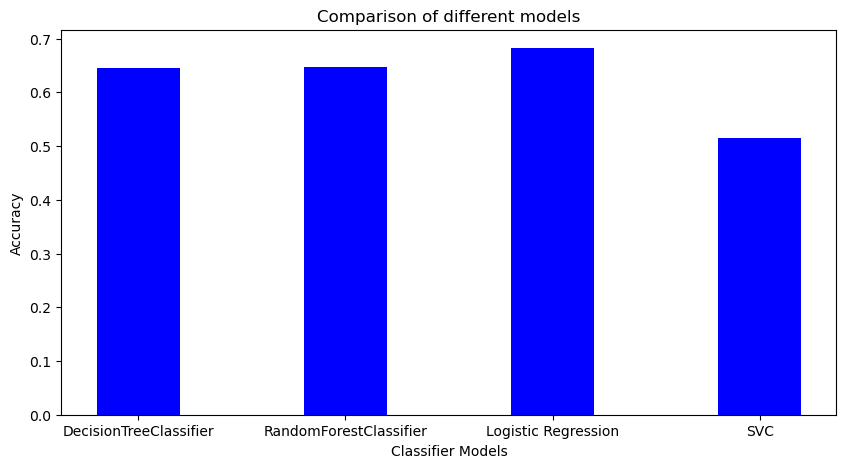

In [61]:
# comparing the accuracy of different models
data = {'DecisionTreeClassifier':0.6456762749445676, 'RandomForestClassifier':0.6480747681377107, 'Logistic Regression':0.6825119805450254 ,'SVC':0.5158286245619055}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))
# creating the bar plot
# creating the bar plot
plt.bar(courses, values, color ='blue',width = 0.4)
plt.xlabel('Classifier Models')
plt.ylabel('Accuracy')
plt.title('Comparison of different models')

# Conclusion 

## The best algorithm is Logistic Regression